In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sn

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
print(data.head())
X = data.iloc[:, :-1].values
y = data.iloc[:, -1:].values
print(X.shape, y.shape)


   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
(400, 2) (400, 1)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)

(320, 2) (320, 1)


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
classifier = LogisticRegression(random_state=0, multi_class='auto')
classifier.fit(X_train, y_train)

C:\Users\sabih\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

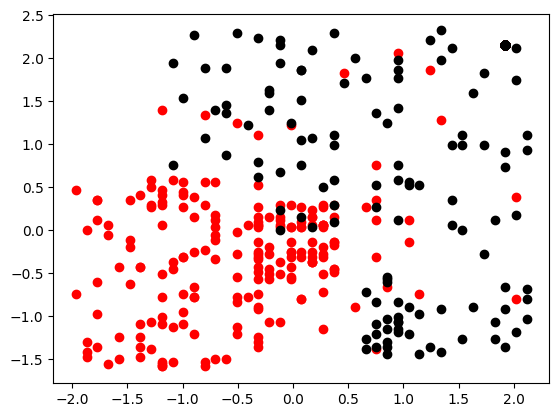

In [6]:
zero = np.where(y_train==0)
ones = np.where(y_train==1)

plt.scatter(X_train[zero,0], X_train[zero, 1], c='r')
plt.scatter(X_train[ones,0], X_train[ones, 1], c='k')


iterations: 0 || cost: 0.5241910427999711
iterations: 1000 || cost: 0.20368212612125772
iterations: 2000 || cost: 0.20334929099678656
iterations: 3000 || cost: 0.20334682452674935
iterations: 4000 || cost: 0.2033468061436665
iterations: 5000 || cost: 0.2033468060066479
iterations: 6000 || cost: 0.20334680600562677
iterations: 7000 || cost: 0.2033468060056205
iterations: 8000 || cost: 0.2033468060056205
iterations: 9000 || cost: 0.2033468060056205


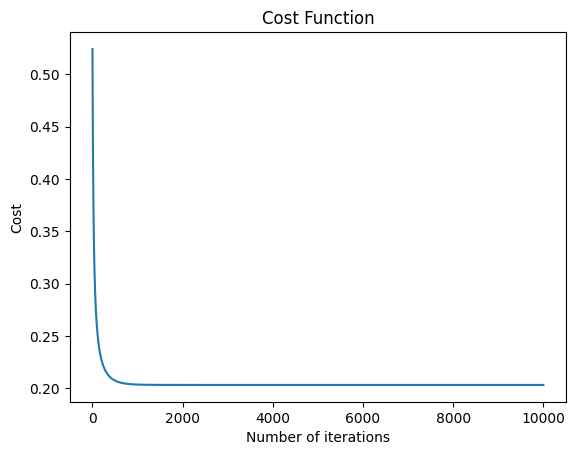

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def multiclass_logistic_regression(X, y, num_classes, num_iterations, alpha):
    m, n = X.shape
    theta = np.zeros((n, num_classes))

    cost_history = []

    for i in range(num_iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        cost = (-1/m) * np.sum(y*np.log(h + 1e-6))
        cost_history.append(cost)
        gradients = (1/m) * np.dot(X.T, (h-y))
        theta = theta - alpha * gradients

        if i % 1000 == 0:
            print('iterations:', i, '||', 'cost:', cost)

    plt.plot(range(len(cost_history)), cost_history)
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    plt.title('Cost Function')
    plt.show()
    

multiclass_logistic_regression(X_train,y_train,2,10000,0.1)


# # run logistic regression
# theta, cost_history = logistic_regression(X, y, alpha=0.001, num_iterations=1000)

# # plot cost function over iterations
# plt.plot(range(len(cost_history)), cost_history)
# plt.xlabel('Number of iterations')
# plt.ylabel('Cost')
# plt.title('Cost Function')
# plt.show()


In [8]:
y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classifier.coef_, classifier.intercept_)

0.925
[[2.00316198 1.08088613]] [-0.87076381]


In [9]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[57  1]
 [ 5 17]]


<Axes: >

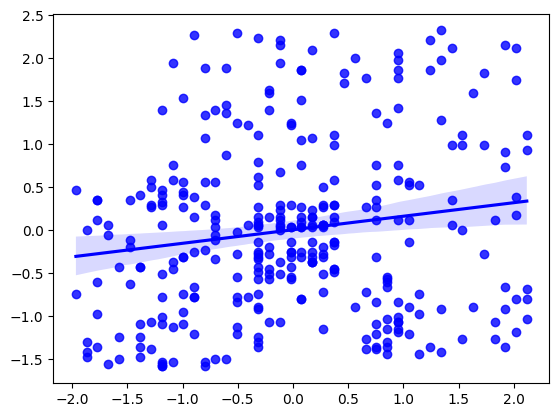

In [10]:
sn.regplot(data, x=X_train[:,0], y=X_train[:,1],color='b')

In [11]:
w = classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 2)
yy = a * xx - (classifier.intercept_[0]) / w[1]

print(w)
print(a)
print(xx)
print(yy)

[2.00316198 1.08088613]
-1.8532590279730452
[-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]
[ 4.51211985  4.3608334   4.20954695  4.0582605   3.90697405  3.7556876
  3.60440115  3.45311469  3.30182824  3.15054179  2.99925534  2.84796889
  2.69668244  2.54539599  2.39410954  2.24282308  2.09153663  1.94025018
  1.78896373  1.63767728  1.48639083  1.33510438  1.18381792  1.03253147
  0.88124502  0.72995857  0.57867212  0.42738567  0.2760

In [21]:
np.linspace(10,20).shape

(50,)

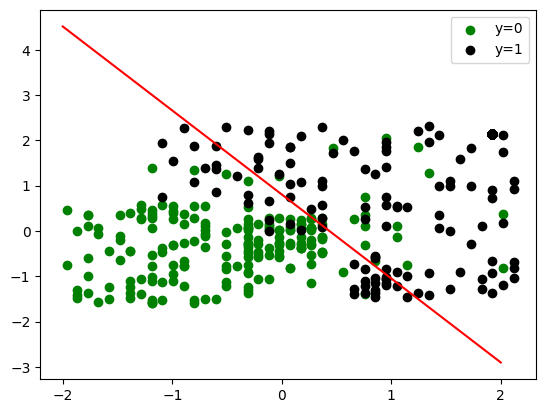

In [12]:
w = classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 2)
yy = a * xx - (classifier.intercept_[0]) / w[1]

plt.plot(xx, yy, c='r')

plt.scatter(X_train[zero,0], X_train[zero, 1], c='g', label='y=0')
plt.scatter(X_train[ones,0], X_train[ones, 1], c='k', label='y=1')

plt.legend()

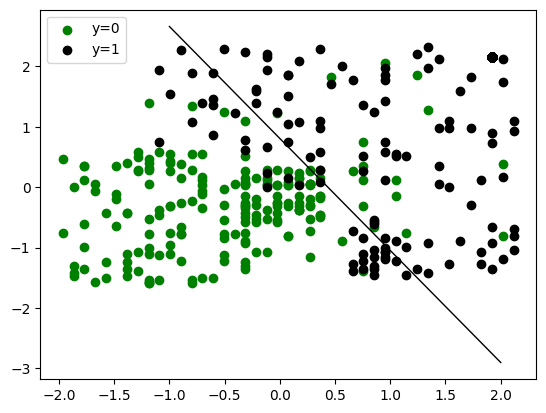

In [16]:
b = classifier.intercept_[0]
w1,w2 = classifier.coef_.T

c = -b/w2
m = -w1/w2

xmin, xmax = -1,2
ymin, ymax = -1,2.5

xd = np.array([xmin, xmax])
yd = m*xd + c


plt.scatter(X_train[zero,0], X_train[zero, 1], c='g', label='y=0')
plt.scatter(X_train[ones,0], X_train[ones, 1], c='k', label='y=1')

plt.legend()
plt.plot(xd, yd, 'k', lw=1)
